In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Import the dataset
dataset = pandas.read_csv('winequality-red.csv', sep = ';')
x = dataset.iloc[:, :-1].values #Predictors/features
y = dataset.iloc[:, -1].values # Target

# Split the dataset into the training set and test set
# We're splitting the data in 1/3
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 42)

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
sorted(dataset['quality'].unique())

[3, 4, 5, 6, 7, 8]

In [5]:
#Target Variable
dataset.iloc[:, -1].head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [6]:
#Predictor Variables
dataset.iloc[:, :-1].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Correlation Matrix

In [7]:
data_col = dataset.columns

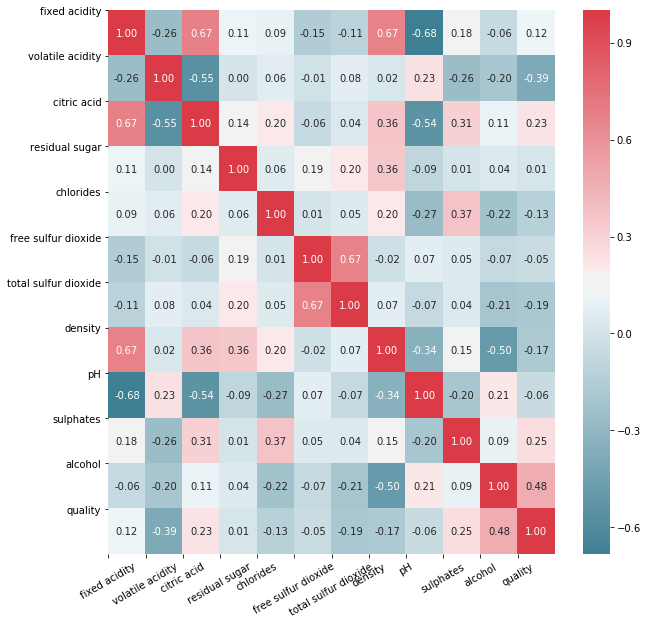

In [8]:
#Create Correlation df
corr = dataset[list(data_col)].corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=30);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

### Model Training:

In [10]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
yPrediction = linearRegressor.predict(xTest)

### Model Evaluation:

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Coefficients: \n', linearRegressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(yTest, yPrediction))
# MAE
print('MAE score: %.2f' % mean_absolute_error(yTest, yPrediction))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yTest, yPrediction))

Coefficients: 
 [ 1.64350670e-02 -1.04543551e+00 -2.13245527e-01  1.80616966e-02
 -1.69881923e+00  3.28468124e-03 -3.01518543e-03 -1.92223391e+01
 -3.52689553e-01  7.80541134e-01  2.91161683e-01]
Mean squared error: 0.42
MAE score: 0.51
Variance score: 0.36


In [ ]:
plot.scatter(xTrain, yTrain, color = 'red')
plot.plot(xTrain, linearRegressor.predict(xTrain), color = 'blue')
plot.title('Salary vs Experience (Training set)')
plot.xlabel('Years of Experience')
plot.ylabel('Salary')
plot.show()